<a href="https://colab.research.google.com/github/magrathealabs/university/blob/master/digital-image-processing/class1_DIP_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1 (Processamento de Imagens Digitais)

## Sumário


1. Introdução
  - Conceitos básicos de uma imagem digital
    - Etapas do Processamento de Imagens Digitais
    - Modelo de uma imagem digital
    - Exemplos de aplicações
2. Fundamentos de imagens digitais
  - Representação
    - Domínio espacial, espaço de cor (RGB), pixels e valor de intensidade
  - Relações básicas entre pixels
    - Vizinhança 
    - Interpolação 
    - Conectividade
    - Regiões
    - Fronteiras
    - Limiarização
    - Segmentação
    - Medidas de distância entre pixels (Similaridade)
  - Operações matemáticas básicas 
    - Operações aritméticas


## Introdução

### Conceitos básicos de uma imagem digital

#### Etapas do Processamento de Imagens Digitais




<img width="500" alt="portfolio_view" src="https://docs.google.com/uc?export=download&id=18RkDyExyNwgE14BAqycx1chfL0KMdZgy">

1. **Aquisição**:
  - No processamento de imagens, é definida como a ação de recuperar uma imagem de alguma fonte, geralmente uma fonte baseada em hardware para processamento

2. **Melhoramento**:
  - É o processo de ajustar imagens digitais para que os resultados sejam mais adequados para exibição ou posterior análise de imagens

3. **Restauração**:
  - É o processo de recuperar uma imagem que foi degradada. É a operação de restaurar uma imagem ruidosa e estimar a imagem limpa e original. A degradação pode ocorrer de várias formas, como desfoque de movimento, ruído e foco incorreto da câmera
  
4. **Processamento de imagens coloridas**:
  - Esta parte lida com o processamento de imagens coloridas
  
5. **Wavelets e processamento de multiresolução**:
  - Ondas ou _wavelets_ são pequenas ondas de duração limitada, usadas para calcular a transformação de wavelets, onde a imagem pode ser filtrada no domínio de frequência
  - Wavelets levam ao processamento de várias resoluções, onde imagens são representadas em vários graus de resolução
  
6. **Compressão**:
  - Técnicas para reduzir o espaço de armazenamento necessário para salvar uma imagem
  
7. **Processamento morfológico**:
  - Lida com a extração de componentes da imagem que são úteis na representação e descrição da forma. Inclui operações morfológicas básicas como erosão e dilatação.
  
8. **Segmentação**:
  - É o processo de particionar uma imagem digital em vários segmentos. Geralmente é usado para localizar objetos e limites em objetos.
  
9. **Representação e Descrição**:
  - Representação:
    - Forma como desejamos representar os objetos que estamos analisando
      - Contorno dos objetos (forma externa dos objetos: perímetro, quinas, etc)
      - Região dos objetos (propriedades internas dos objetos: textura, esqueleto, etc)
  - Descrição:
    - Seleção de características ou atributos que irão resultar em alguma informação quantitativa de interesse, ou será base para diferenciar uma classe de outras classes de objetos
  
10. **Reconhecimento**:
  - É o processo de rotular uma imagem baseado na descrição ou características extraídas da imagem



#### Modelo de uma imagem digital

- **Domínio espacial**:
  - Uma imagem digital é uma função bidimensional contínua $f(x,y)$, na qual $x$ e $y$ são coordenadas espaciais e o valor de $f$ em qualquer ponto $(x,y)$ é proporcional à intensidade luminosa (brilho ou nível de cinza) no ponto considerado 

  - São os pixels em uma imagem

<img width="400" alt="portfolio_view" src="https://docs.google.com/uc?export=download&id=16fjbgSZjxVn_Bt9I_82tNFsMA9PxhNkY">




#### Exemplos de aplicações

 - **Imagem de raios gama**: “escaneamento” do esqueleto
  
  <img width="200" alt="portfolio_view" src="https://docs.google.com/uc?export=download&id=14IF8qZStEBtxaWYD4Ux8OYS6NVbbjKcE">
  

 - **Imagem de raio x**: raio X do tórax
 
  <img width="200" alt="portfolio_view" src="https://docs.google.com/uc?export=download&id=1DvfzOkK6BvPV55gB16UO6IIMdN9j19wf">

 - **Imagem em ultra-violeta**: Milho normal e milho infectado
   
  <img width="200" alt="portfolio_view" src="https://docs.google.com/uc?export=download&id=1yH6adKfhE4w84ZO-FNEAm8PCJGXlLpnY">

 - **Imagem infravermelha**: Emitido por dispositivos ou corpos aquecidos – radiação térmica. As moléculas de um corpo a uma temperatura superior à do zero absoluto (-273 °Celsius) radiam no IV ainda que com intensidade
reduzida.
 
  <img width="400" alt="portfolio_view" src="https://docs.google.com/uc?export=download&id=1ThtXVrQCHrD5I4c2tQMmx8ur6LKIxPi4">

## Fundamentos de imagens digitais

### Representação

 - Uma imagem digital pode ser representanda no **domínio espacial ou de frequência**, primeiramente vamos avaliar o **domínio espacial** da imagem
 
  - **Pixels e valores de intensidade**: Como já vimos os pixels são os pontos de intesidade luminosa em uma imagem
  - **Expaços de cor**: Imagens coloridas são armazenadas em 3 componentes primários formando um espaço de cor
    - RGB: soma ponderada dos componentes Red (R), Green (G) e Blue (B)
    - HSV (Matiz, Saturação e Brilho) 

  - Durante a aula vamos utilizar a linguagem de programação **Python**, a biblioteca de processamento de imagens digitais **OpenCV** e algumas bibliotecas auxiliares. A seguir vamos importar estas bibliotecas.

In [0]:
!pip3 install opencv-python 
!pip3 install matplotlib   
import urllib.request
import cv2
import numpy as np         
import pandas as pd        
import matplotlib.pyplot as plt

  - A seguir, criamos algumas funções para facilitar a leitura e exibição de imagens, como estamos trabalhando no Google Colab, vamos ler imagens do repositório do Drive. Normalmente trabalhamos no computador local. Caso este fosse o caso é muito mais simples ler uma imagem, através o seguinte comando:
    - `img = cv2.imread('caminho/para/a/imagem.extensao')` 

In [0]:
def read_image_from_drive(url, type):
  resp = urllib.request.urlopen(url)
  img_byte = np.asarray(bytearray(resp.read()), dtype="uint8")
  if type == 0:
    return cv2.imdecode(img_byte, cv2.IMREAD_GRAYSCALE)
  else:
    img = cv2.imdecode(img_byte, cv2.IMREAD_COLOR)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

  - A seguir, temos a função que vamos utilizar para mostrar imagens diretamente neste _notebook_. Normalmente, utilizaríamos o seguinte comando:
    - `cv2.imshow(imagem_na_memoria, 'titulo da janela')`
    
  - Como estamos no Google Colab, vamos utilizar a biblioteca `matplotlib`, com o seguinte comando:
    - `plt.imshow(imagem_na_memoria)`
  - A seguinte função recebe uma lista e apresenta as imagens
  

In [0]:
def plot_images_inline(imgs):
  fig = plt.figure()
  for n, img in enumerate(imgs):
      fig.add_subplot(1, np.ceil(len(imgs)/float(1)), n + 1)
      plt.imshow(img, cmap='gray')

  fig.set_size_inches(np.array(fig.get_size_inches()) * len(imgs))
  plt.show()

  - A seguir estamos lendo uma imagem do Drive e apresentando na tela. Para isto usaremos a função `read_image_from_drive` passando como parâmetro o link para _download_ da imagem no Drive (necessita estar pública)

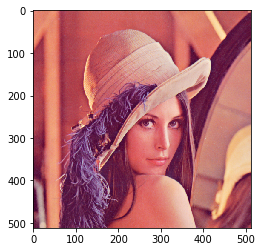

In [0]:
img = read_image_from_drive('https://docs.google.com/uc?export=download&id=1AQnsvwckAAS4ILKBFbARXFtmlWf6B19P', 1)

plt.imshow(img)

  - Esta é uma imagem RGB composta por três canais (imagens) com seus respectivos níveis de intensidade luminosa. Cada imagem é sobreposta formando a imagem que vemos acima. Agora, vamos separar estes canais.

In [0]:
B,G,R = cv2.split(img)

R = pd.DataFrame(R)
G = pd.DataFrame(G) 
B = pd.DataFrame(B)

R.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511
0,125,125,133,128,120,116,123,124,127,119,126,121,108,119,120,114,108,113,121,114,109,105,102,109,110,113,108,98,121,111,121,109,103,109,106,122,112,124,104,123,...,92,103,99,91,95,91,88,96,98,100,100,97,100,108,91,101,93,89,100,96,86,105,90,96,93,91,88,96,89,90,102,94,104,131,129,126,123,122,110,90
1,125,125,133,128,120,116,123,124,127,119,126,121,108,119,120,114,108,113,121,114,109,105,102,109,110,113,108,98,121,111,121,109,103,109,106,122,112,124,104,123,...,92,103,99,91,95,91,88,96,98,100,100,97,100,108,91,101,93,89,100,96,86,105,90,96,93,91,88,96,89,90,102,94,104,131,129,126,123,122,110,90
2,125,125,133,128,120,116,123,124,127,119,126,121,108,119,120,114,108,113,121,114,109,105,102,109,110,113,108,98,121,111,121,109,103,109,106,122,112,124,104,123,...,92,103,99,91,95,91,88,96,98,100,100,97,100,108,91,101,93,89,100,96,86,105,90,96,93,91,88,96,89,90,102,94,104,131,129,126,123,122,110,90
3,125,125,133,128,120,116,123,124,127,119,126,121,108,119,120,114,108,113,121,114,109,105,102,109,110,113,108,98,121,111,121,109,103,109,106,122,112,124,104,123,...,92,103,99,91,95,91,88,96,98,100,100,97,100,108,91,101,93,89,100,96,86,105,90,96,93,91,88,96,89,90,102,94,104,131,129,126,123,122,110,90
4,125,125,133,128,120,116,123,124,127,119,126,121,108,119,120,114,108,113,121,114,109,105,102,109,110,113,108,98,121,111,121,109,103,109,106,122,112,124,104,123,...,92,103,99,91,95,91,88,96,98,100,100,97,100,108,91,101,93,89,100,96,86,105,90,96,93,91,88,96,89,90,102,94,104,131,129,126,123,122,110,90


  - A seguir vamos eliminar os valores de intesidade dos outros canais (definindo para 0) e apresentar os canais separadamente para visualizarmos as imagens.

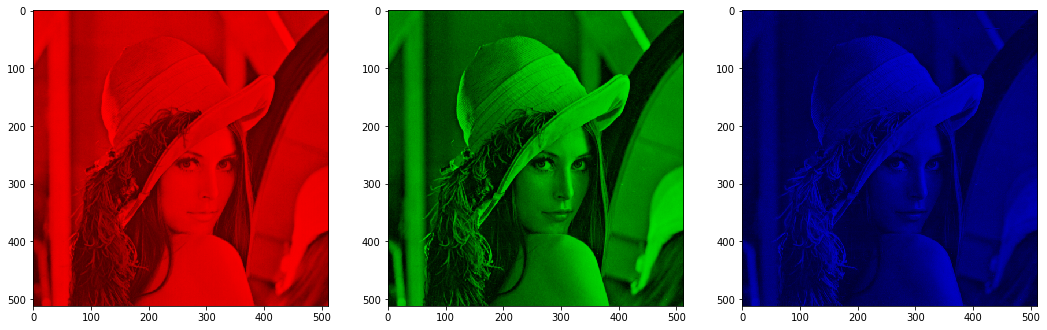

In [0]:
red = img.copy()
red[:, :, 1] = 0
red[:, :, 2] = 0

green = img.copy()
green[:, :, 0] = 0
green[:, :, 2] = 0

blue = img.copy()
blue[:, :, 0] = 0
blue[:, :, 1] = 0

imgs = [red, green, blue]

plot_images_inline(imgs)

#### Exercício #1
  - Lendo imagens:
    - Ler esta imagem: https://docs.google.com/uc?export=download&id=17IsJJCMyaOoyARItuzWp1_MddX1ty3AW
    - Apresenta-la na tela
    - Separar em três canais
    - E apresenta-los na tela
  

### Relações básicas entre pixels

#### Vizinhança

 - Um pixel na coordenada $(x, y)$ tem quatro vizinhos sendo horizontais e verticais cujas coordenadas são dadas por:
   $(x+1, y), (x-1, y), (x, y+1), (x, y-1)$
     
 - Esse conjunto de pixels, é chamado **vizinhança-4**
      
    <img width="300" alt="portfolio_view" src="https://docs.google.com/uc?export=download&id=14xLYvDtKmSyCs1fj-HFaMA9WArh4Fqh7">

#### Interpolação

  - Sempre que ampliamos ou reduzimos uma imagem estamos trabalhando com interpolação 
  - Interpolação de imagens digitais é basicamente criar novos pixels a partir dos pixels já existentes.
  - Exemplo:
    - Interpolação Bilinear: 
    `g(u0) e g(u0+1), sendo u0=[x]`

      - O peso de cada ponto é proporcional à proximidade da posição continua x
      `ĝ(x)=g(u0)+(x-u0)*(g(u0+1)-g(u0)) = g(u0)*(1-(x-u0))+g(u0+1)*(x-u0)`
    

<center><img width="500" alt="portfolio_view" src="https://docs.google.com/uc?export=download&id=1J_jcVn-P1-vurUKuvHCD9P_Xisipz-_d" style=""></center>



A seguir vamos utilizar a função [`resize`](https://docs.opencv.org/trunk/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d) do OpenCV para redimencionar uma imagem

img original: (512, 512, 3)
img redimensionada: (24, 24, 3)


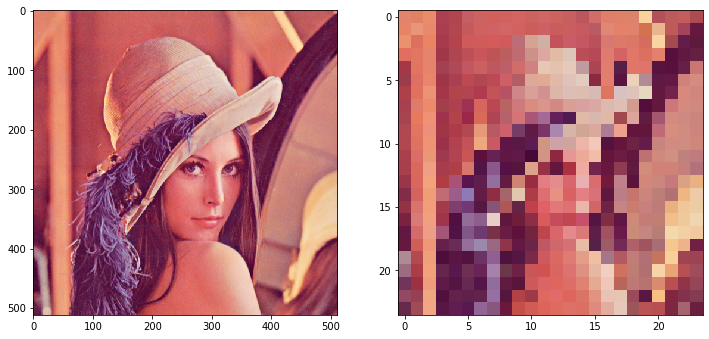

In [0]:
img_resized = cv2.resize(img, (24, 24), interpolation=cv2.INTER_LINEAR)

print("img original: " + str(img.shape))
print("img redimensionada: " + str(img_resized.shape))

R = pd.DataFrame(img_resized[0])
G = pd.DataFrame(img_resized[1]) 
B = pd.DataFrame(img_resized[1]) 

R.columns = pd.MultiIndex.from_product([['R'], R.columns])
G.columns = pd.MultiIndex.from_product([['G'], G.columns])
B.columns = pd.MultiIndex.from_product([['B'], B.columns])
pd.concat([R, G, B], axis = 1)

plot_images_inline([img, img_resized])

#### Conectividade:

  - A conectividade entre pixels estabelece quando estes estão conectados, quando possuem a mesma propriedade para pertencer à mesma região
  
  <img width="500" alt="conectividade" src="https://docs.google.com/uc?export=download&id=1xOS0a9JReKkZ4uKNGxequ_fWjzUwW0G3">

#### Regiões:

 - Um grupo de pixels conectados com propriedades similares

 <img width="500" alt="region" src="https://docs.google.com/uc?export=download&id=1KJ8h9Qw2CPzp2sbbm7iNgon5yM2pGDef">
 
 

No exemplo acima, a imagem original apresenta círculos com buracos no meio. Aplicando **processamento morfológico** conseguimos preencher este "buracos". 
  - **Filtro morfológico de dilatação**: provoca efeitos de dilatação das partes escuras da imagem (baixos níveis de cinza), gerando imagens mais claras.
  <br>
 <img width="500" alt="region" src="https://docs.google.com/uc?export=download&id=1cV3iiCewAlR2Fb35kz3PlN-sPWVyx9tT">
 
  - Efeitos da Dilatação:
    - "Engordar" partículas
    - Preencher pequenos "buracos" 
    - Conectar grãos próximos
    
No OpenCV, para dilatar uma imagem usamos os seguintes comando:
  - kernel = np.ones((altura,largura), np.uint8)
  - cv2.[dilate](https://docs.opencv.org/trunk/d4/d86/group__imgproc__filter.html#ga4ff0f3318642c4f469d0e11f242f3b6c)(imagem, kernel, iterations=numero_de_iteracoes)

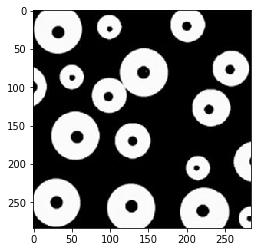

In [0]:
img = read_image_from_drive('https://docs.google.com/uc?export=download&id=1AeytVK6WfN6VW82zwe2KcBxfgisTYw7t', 0)

plt.imshow(img, cmap='gray')

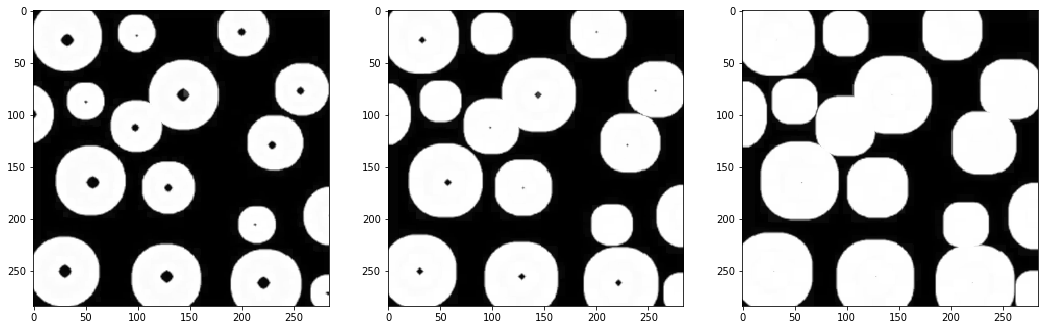

In [0]:
kernel = np.ones((5,5), np.uint8)

img_dilation_1 = cv2.dilate(img, kernel, iterations=1) 
img_dilation_2 = cv2.dilate(img, kernel, iterations=2) 
img_dilation_3 = cv2.dilate(img, kernel, iterations=3) 

imgs = [img_dilation_1, img_dilation_2, img_dilation_3]

plot_images_inline(imgs)

  - **Filtro morfológico de erosão**: provoca efeitos de erosão das partes claras da imagem (altos níveis de cinza), gerando imagens mais escuras.

  <img width="500" alt="region" src="https://docs.google.com/uc?export=download&id=11hIZ0rxqW3Bi4dIJpFT6e6gsQp_KMjcL">
  
  - Efeitos da Erosão:
    - Diminuir partículas
    - Eliminar áreas de tamanho inferior ao tamanho do elemento estruturante
    - Aumentar "buracos"
    - Permitir a separação de áreas próximos
    
No OpenCV, para dilatar uma imagem usamos os seguintes comando:
  - `kernel = np.ones((altura,largura), np.uint8)`
  - `cv2.`[`erode`](https://docs.opencv.org/trunk/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb)`(imagem, kernel, iterations=numero_de_iteracoes)`

Além destas funções, existem outras maneiras de aplicar processamento morfológico em images. Este [link](https://docs.opencv.org/trunk/d9/d61/tutorial_py_morphological_ops.html) pode ajudar no próximo exercício.

#### Exercício #2
  - Processamento morfologico:
    - Ler esta imagem: https://docs.google.com/uc?export=download&id=13YGya60ELhQjYNVDMsUyN2IAfLxWkluf
    - Remover as estrelas do céu
    - E apresenta-la na tela
  

<br>
<center><img width="300" alt="fronteira" src="https://docs.google.com/uc?export=download&id=13YGya60ELhQjYNVDMsUyN2IAfLxWkluf"></center>

#### Fronteira (borda ou contorno): 

  - É o conjunto de pixels que representa a borda de uma região
 
<br>

<center><img width="500" alt="fronteira" src="https://docs.google.com/uc?export=download&id=1CnGIXOrCjeuEeid6sVbR0N0J6cbbPnZP"><center>



A seguir, vamos fazer a detecção das bordas da imagem a cima, como podemos ver não é uma tarefa trivial onde a aplicação de um método detecta as bordas de qualquer imagem, existem parâmetros a serem ajustados e diferentes técnicas podem ser aplicadas 
  - `cv2.`[`canny`](https://docs.opencv.org/trunk/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de)`(imagem, limiar1, limiar2)`

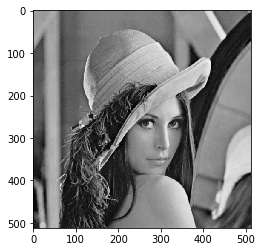

In [0]:
img = read_image_from_drive('https://docs.google.com/uc?export=download&id=1AQnsvwckAAS4ILKBFbARXFtmlWf6B19P', 0)

plt.imshow(img, cmap='gray')

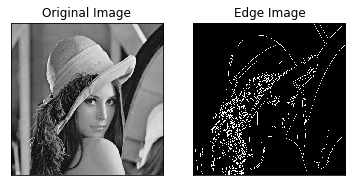

In [0]:
blur = 
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

#### Exercício #3 - Detecção de bordas
  - Neste exercício, vamos utilizar a mesma imagem anterior. Porém, ao invés de utilizar a técnica Canny para detecção de bordas, vamos utlizar [`Laplacian`](https://docs.opencv.org/trunk/d4/d86/group__imgproc__filter.html#gad78703e4c8fe703d479c1860d76429e6) e [`Sobel`](https://docs.opencv.org/trunk/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d)

  - Para ler a imagem utilize:
```
img = read_image_from_drive('https://docs.google.com/uc?export=download&id=1AQnsvwckAAS4ILKBFbARXFtmlWf6B19P', 0)
```


#### Limiarização



<center><img width="500" alt="segmentacao" src="https://docs.google.com/uc?export=download&id=1r3suEiaFvxRrLo1Gj68pK4_Wgth2HBsd"></center>

Acima temos a imagem de um cránio, com a sua **limiarização** conseguimos processar essa imagem de maneira que fique como a imagem da direita. **Limiarização** é o processo de definir um limiar (valor de intensidade específico), onde todos os valores abaixo deste limiar se tornam 0 e maiores se tornam um valor máximo definido.

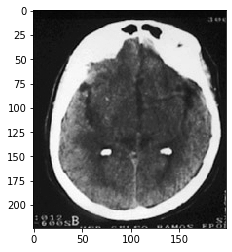

In [0]:
img = read_image_from_drive('https://docs.google.com/uc?export=download&id=1Ub9iYGnlwDAFvZEEFySapkwfHcs4Pgeu', 0)

plt.imshow(img, cmap='gray')

Como a imagem já se encontra em níveis de cinza, não precisamos transforma-la. Assim, basta usar a função [`threshold`](https://docs.opencv.org/trunk/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57) do OpenCV 

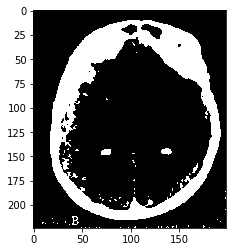

In [0]:
thresh, img_thresholded = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(img_thresholded, cmap='gray')

Neste caso usamos uma técnica chamada Otsu que automaticamente encontra o melhor limiar para nós

Como vocês podem ver a imagem não ficou igual a do exemplo. Para isto, uma boa prática é sempre aplicar uma técnica de suavização chamada [`blur`](https://docs.opencv.org/trunk/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37) na imagem antes de aplicar a limiarização

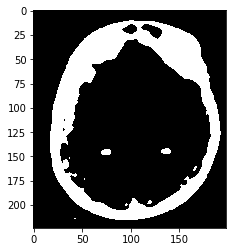

In [0]:
blur = cv2.blur(img, (5,5))
thresh, img_thresholded = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(img_thresholded, cmap='gray')

#### Exercício #4
  - Aplicar limiarização em uma imagem na seguinte imagem: https://docs.google.com/uc?export=download&id=1Udx0GgobkTd_1pSPiP5iM6UVUhFn22kg

#### Segmentação 

 - processo de dividir uma imagem em múltiplas regiões (conjunto de pixels) ou objetos

Abaixo veremos um exemplo de segmentação. Neste exemplo, vamos definir uma sequência de técnicas para contar o número de moedas automaticamente na seguinte imagem

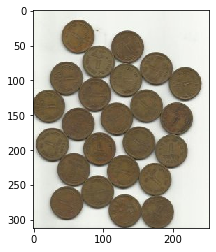

In [0]:
img = read_image_from_drive('https://docs.google.com/uc?export=download&id=1Y-NiDdeZl3f125PY_5sdMEocE1k13tLb', 1)

plt.imshow(img)

Primeiro, transformamos esta imagem para níveis de cinza, onde teremos somente um canal para trabalhar com a imagem

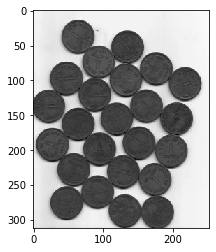

In [0]:
gray = read_image_from_drive('https://docs.google.com/uc?export=download&id=1Y-NiDdeZl3f125PY_5sdMEocE1k13tLb', 0)

plt.imshow(gray, cmap='gray')

Em seguida aplicamos a limiarização 

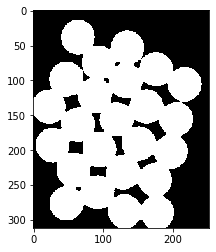

In [0]:
blur = cv2.blur(gray,(5,5))
ret, thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')

Agora as regiões estam definidas, porém ainda estão conectadas. Precisamos resolver isto. Então utilizamos a técnica de erosão que vimos anteriormente

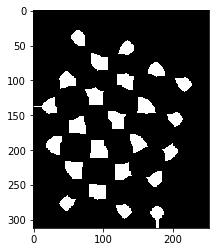

In [0]:
kernel = np.ones((3,3), np.uint8) 
thresh_eroded = cv2.erode(thresh, kernel, iterations=11)
thresh_eroded_to_show = cv2.cvtColor(thresh_eroded, cv2.COLOR_GRAY2RGB)

plt.imshow(thresh_eroded_to_show)

A seguir, utilizamos uma técnica que conta quantos contornos temos na imagem

In [0]:
img, contours, h = cv2.findContours(thresh_eroded,1,2)

len(contours)

24

Podemos ver aqui uma métodologia ingênua para contar modedas. Em casos reais temos situação que esta sequência de técnicas não é eficaz

#### Execício #5
  - Contar o número de moedas na imagem abaixo
  <br><img width="300" alt="segmentacao" src="https://docs.google.com/uc?export=download&id=1i7_74X-D--jcM0UBR3yVrZzfckZILSGq">
<br>
  - Lembrem sempre de ler a documentaçao e entender os parâmetros das funções que estam utilizando
  - Link para ler a imagem: https://docs.google.com/uc?export=download&id=1i7_74X-D--jcM0UBR3yVrZzfckZILSGq
  

#### Medidas de distância entre pixels (Similaridade)

- Distância Euclidiana
  - Através do cáculo da distância euclidiana pode-se medir a distância entre dois pixels de imagens diferentes e, consequentemente, a similaridade entre duas imagens
 
<center><img width="300" alt="distancia_euclidiana" src="https://docs.google.com/uc?export=download&id=1yjORnUiHQ13mlazrryUf4k7KWh26SlQ5"></center>


A seguir vamos medir a distância entre imagens de faces de pessoas. Utilizaremos uma face base comparando com outras 5 faces, sendo uma delas a mesma pessoa em uma posição diferente, por fim, retornaremos a imagem mais similar. Será que conseguiremos identificar a pessoa desta maneira? 

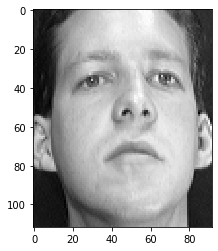

In [0]:
img_target = read_image_from_drive('https://docs.google.com/uc?export=download&id=1ygVkBQtaHqs2CAOOY7d53KL6nGgNvGmO', 0)

plt.imshow(img_target, cmap='gray')

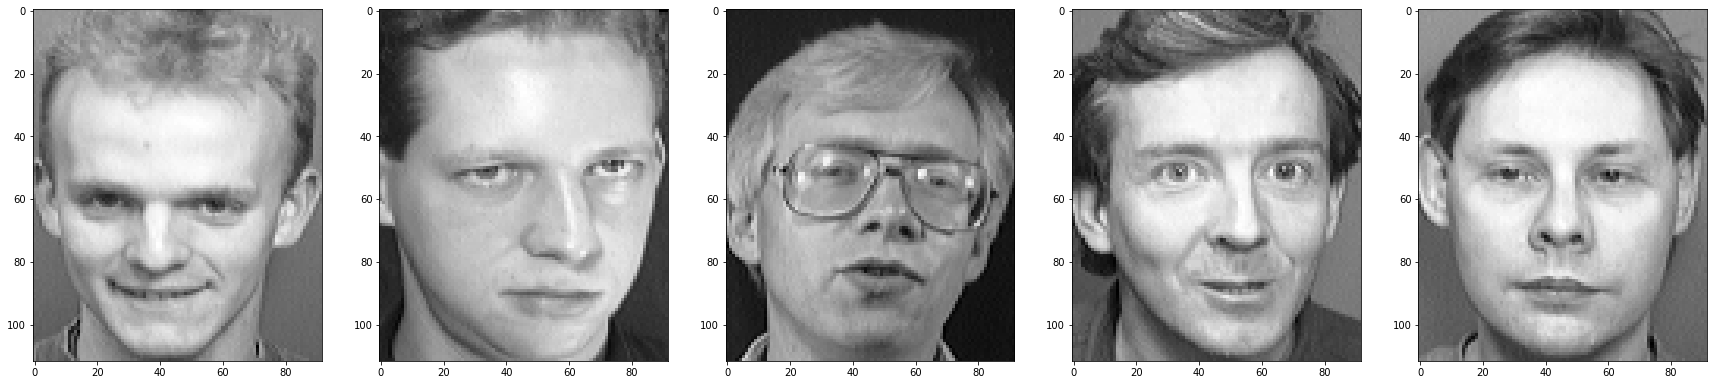

In [0]:
face_img_1 = read_image_from_drive('https://docs.google.com/uc?export=download&id=1z4Ja9xPz6dpDJm3JntQYZI1HCgizkhfB', 0)
face_img_2 = read_image_from_drive('https://docs.google.com/uc?export=download&id=1xiezUq8EVdOSCuXqpWJOCzoPPn4o7GlH', 0)
face_img_3 = read_image_from_drive('https://docs.google.com/uc?export=download&id=1M-f5NfZRkm4hiMPF5KfkfNWIt9yI1sVm', 0)
face_img_4 = read_image_from_drive('https://docs.google.com/uc?export=download&id=1q1eTWtrZ-aVwg84IzVHKxBYb8wKkaIIA', 0)
face_img_5 = read_image_from_drive('https://docs.google.com/uc?export=download&id=1k5IEvu-M7YBDgnA_zQ2bT8J5yikoC72V', 0)

face_imgs = [face_img_1, face_img_2, face_img_3, face_img_4, face_img_5]

plot_images_inline(face_imgs)

Abaixo, utilizamos a função [`norm`](https://docs.opencv.org/trunk/d2/de8/group__core__array.html#ga55a581f0accd8d990af775d378e7e46c) do OpenCV para medir a similaridade entre imagems

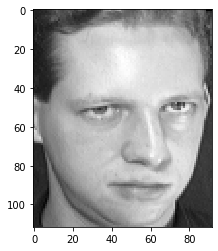

In [0]:
min_dist = float('inf')
norms = []

for img in face_imgs:
    dist = cv2.norm(img, img_target, cv2.NORM_L2)
    norms.append(dist)
    if dist < min_dist:
        min_dist = dist
        img_found = img

plt.imshow(img_found, cmap='gray')

Neste case, utilizamos imagens normalizadas ou seja, imagens tiradas  em um mesmo ambiente e controlado. Mesma iluminação, leve rotação entre as imagens. As pessoas não estão usando adornos como chapéus e oculos. **Este é um dos grandes desafios em computação visual**, pois no mundo real as fotos das pessoas estão sujeitas a diversas influências. Assim, precisam de métodos robustos que lidem com estes problemas

#### Exercício #6
  - Identificando objetos apenas pelas distância entre pixels
<br>
<center><img width="500" alt="segmentacao" src="https://docs.google.com/uc?export=download&id=1VlCDQlEkOagL267wApywy8fQHtizJ78z"></center>
<br>

  - Link para ler a imagem: https://docs.google.com/uc?export=download&id=1VlCDQlEkOagL267wApywy8fQHtizJ78z

#### Operações matemáticas básicas 

Operações matemáticas básicas 
<br>
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-0pky">Operação</th>
    <th class="tg-0pky">Efeito sobre a imagem</th>
    <th class="tg-0pky">Aplicação</th>
  </tr>
  <tr>
    <td class="tg-0pky">Adição</td>
    <td class="tg-0pky">Z é o resultado da soma dos valores de  intensidade de X e Y. Se Y for um escalar positivo, <br> Z será uma versão mais clara de X; o acréscimo de intensidade será o próprio valor de Y.</td>
    <td class="tg-0pky">Normalização de brilho de imagens <br>Remoção de ruídos </td>
  </tr>
  <tr>
    <td class="tg-0pky">Subtração</td>
    <td class="tg-0pky">Z é o resultado da diferença dos valores de intensidade de X e Y. Se Y for um escalar positivo,<br> Z será uma versão mais escura de X; o decréscimo de intensidade será o próprio valor de Y.</td>
    <td class="tg-0pky">Detecção de diferenças entre duas imagens da mesma cena</td>
  </tr>
  <tr>
    <td class="tg-0pky">Divisão</td>
    <td class="tg-0pky">Z é a razão dos valores de intensidade de X pelos valores correspondentes em Y. Se Y for um escalar <br> positivo, os valores de intensidade de Z serão inversamente proporcionais a X por um fator Y</td>
    <td class="tg-0pky">Normalização do brilho</td>
  </tr>
  <tr>
    <td class="tg-0pky">Multiplicação</td>
    <td class="tg-0pky">Z é o produto dos valores de intensidade de X e Y. Se Y for um escalar positivo,<br> os valores de intensidade de Z serão diretamente proporcionais a X por um fator Y.</td>
    <td class="tg-0pky">Calibração de brilho </td>
  </tr>
</table>

Abaixo, vamos adicionar uma marca dágua em uma imagem utilizando a função [`addWeighted`](https://docs.opencv.org/trunk/d2/de8/group__core__array.html#gafafb2513349db3bcff51f54ee5592a19) do OpenCV

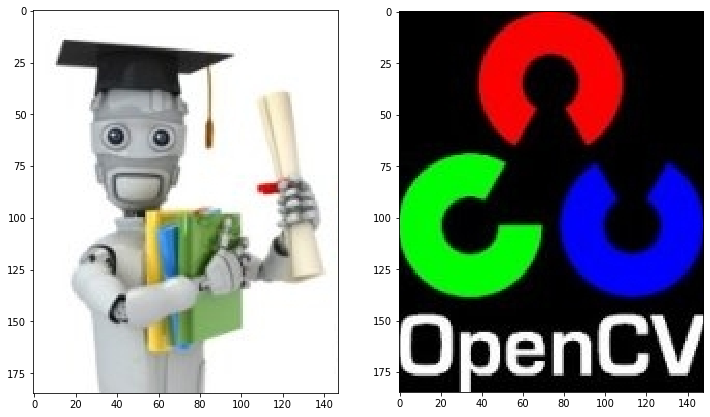

In [0]:
robot = read_image_from_drive('https://docs.google.com/uc?export=download&id=1SPXisCuoI5w3Lev7VZv4sXId2fklU0A7', 1)
opencv_logo = read_image_from_drive('https://docs.google.com/uc?export=download&id=1eCKX9_f_-yBqSaCCXblrbcVHSh_ED01o', 1)

imgs = [robot, opencv_logo]

fig = plt.figure()
for n, img in enumerate(imgs):
    fig.add_subplot(1, np.ceil(len(imgs)/float(1)), n + 1)
    plt.imshow(img)

fig.set_size_inches(np.array(fig.get_size_inches()) * len(imgs))
plt.show()

Primeiro, precisamos garantir que as duas imagens tem as mesmas dimensões

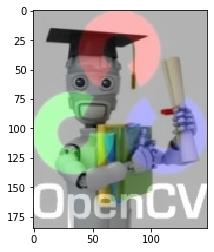

In [0]:
robot = cv2.resize(robot, (opencv_logo.shape[1],opencv_logo.shape[0]), fx=0.5, fy=0.5) 

dst = cv2.addWeighted(robot,0.7,opencv_logo,0.3,0)

plt.imshow(dst)

Agora veremos um exemplo de remoção de fundo utilizando subtração atráves da função [`subtract`](https://docs.opencv.org/trunk/d2/de8/group__core__array.html#gaa0f00d98b4b5edeaeb7b8333b2de353b)

<br>
<center><img width="300" alt="segmentacao" src="https://docs.google.com/uc?export=download&id=1XTVZoWUUaasLRsJFxH7Rnkm3aON_YoRF"></center>
<br>

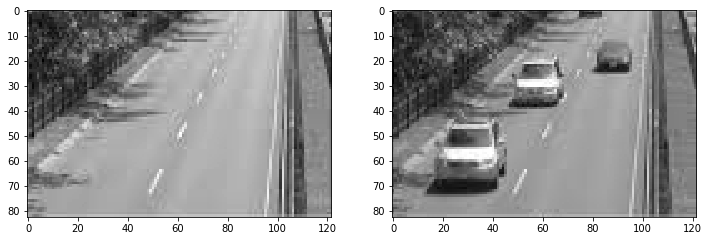

In [0]:
background = read_image_from_drive('https://docs.google.com/uc?export=download&id=1QXDLCpWY0HhnPLmmpiiBItBicaHZI5wV', 0)
frame = read_image_from_drive('https://docs.google.com/uc?export=download&id=1ZpUPlwuDbaqSX5zq2g6YyQHerGr-nDVm', 0)

plot_images_inline([background, frame])

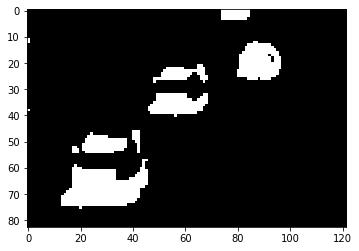

In [0]:
background_blur = cv2.blur(background, (3,3))
frame_blur = cv2.blur(frame, (3,3))
img_result = cv2.subtract(background_blur, frame_blur)

th, img_res = cv2.threshold(img_result, 30, 255, cv2.THRESH_BINARY)

plt.imshow(img_res, cmap='gray')

#### Exercício #7
  - [HaarCascade](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html):
    - Os detectores baseados em cascade (cascata) são chamados assim pois treinam uma árvore de decisão em que cada nível analisa um conjunto de atributos diferentes e avalia se esses atributos representam ou não o objeto de interesse.
 
    <br>
    <center><img width="200" alt="segmentacao" src="https://docs.google.com/uc?export=download&id=1XSkFk9h3adPFoorJqNwUuqTgDKlzsGud">
<br>

  - Para este exercício use a seguinte imagem:
    - https://docs.google.com/uc?export=download&id=1qahuwI8qRZ7_DJBeLN6QrTLJOwgvY-Sl

  - Para ler os arquivos use o seguinte comando:
    ```
    !wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml -P drive/gaze
    !wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml -P drive/gaze
    cascades_path = 'drive/gaze/'

    face_cascade = cv2.CascadeClassifier(cascades_path + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cascades_path + 'haarcascade_eye.xml')
  ```
